# NN for function approximation

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam, RMSprop
import matplotlib.pyplot as plt
import seaborn
plt.style.use("seaborn")

Using TensorFlow backend.
/home/michael/.virtualenvironments/tf/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


## Data

What function to approximate? 

Let's try a polynomial:

$$
f(x) =  x^5 + x^3 + x^2 - 2x - 1
$$

In [2]:
def poly(x):
    """A polynomial function"""
    return x ** 5. + x ** 3. + x ** 2. - 2 * x - 1

In [3]:
x = np.linspace(-1, 1, 1000)
fx = poly(x)

In [4]:
x_train = np.random.uniform(-1, 1, 500)
x_test = np.random.uniform(-1, 1, 100)
y_train, y_test = poly(x_train), poly(x_test)

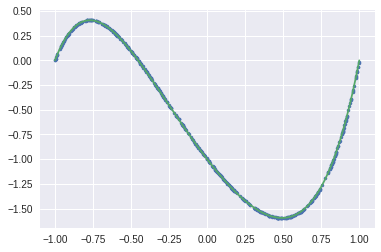

In [10]:
fig = plt.figure()
plt.plot(x_train, y_train, '.')
plt.plot(x, fx)
plt.show()

## Model

In [6]:
model = Sequential()
model.add(Dense(50, input_shape=(1,), activation="tanh"))
model.add(Dense(50, activation="tanh"))
model.add(Dense(50, activation="tanh"))
model.add(Dense(1, activation="linear"))
model.compile(Adam(), loss="mean_squared_error")

## Training

Epoch 0/350
Epoch 5/350
Epoch 10/350
Epoch 15/350
Epoch 20/350
Epoch 25/350
Epoch 30/350
Epoch 35/350
Epoch 40/350
Epoch 45/350
Epoch 50/350
Epoch 55/350
Epoch 60/350
Epoch 65/350
Epoch 70/350
Epoch 75/350
Epoch 80/350
Epoch 85/350
Epoch 90/350
Epoch 95/350
Epoch 100/350
Epoch 105/350
Epoch 110/350
Epoch 115/350
Epoch 120/350
Epoch 125/350
Epoch 130/350
Epoch 135/350
Epoch 140/350
Epoch 145/350
Epoch 150/350
Epoch 155/350
Epoch 160/350
Epoch 165/350
Epoch 170/350
Epoch 175/350
Epoch 180/350
Epoch 185/350
Epoch 190/350
Epoch 195/350
Epoch 200/350
Epoch 205/350
Epoch 210/350
Epoch 215/350
Epoch 220/350
Epoch 225/350
Epoch 230/350
Epoch 235/350
Epoch 240/350
Epoch 245/350
Epoch 250/350
Epoch 255/350
Epoch 260/350
Epoch 265/350
Epoch 270/350
Epoch 275/350
Epoch 280/350
Epoch 285/350
Epoch 290/350
Epoch 295/350
Epoch 300/350
Epoch 305/350
Epoch 310/350
Epoch 315/350
Epoch 320/350
Epoch 325/350
Epoch 330/350
Epoch 335/350
Epoch 340/350
Epoch 345/350


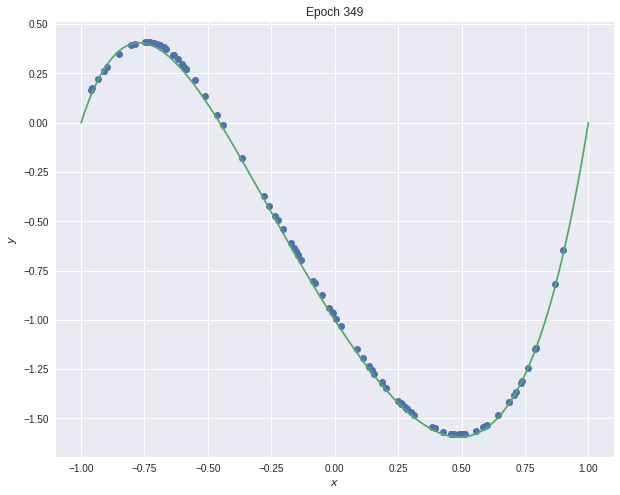

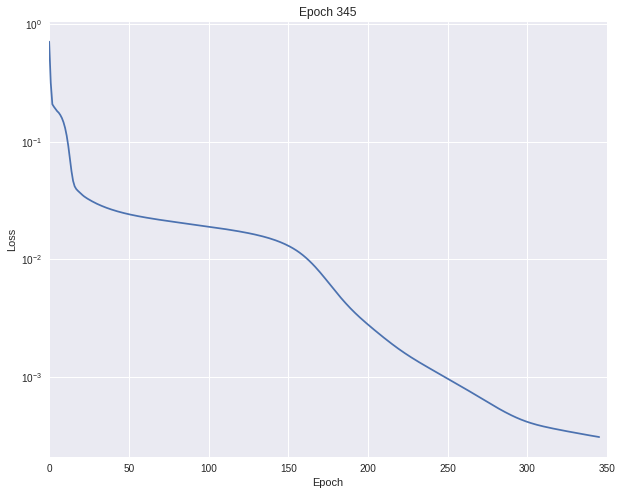

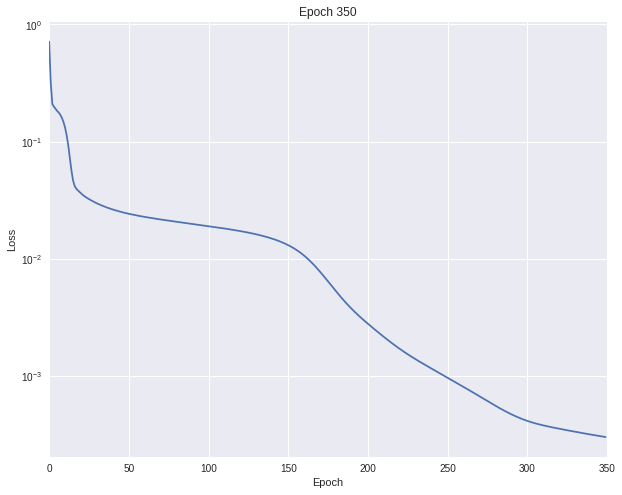

In [7]:
n_epochs = 350
batch_size = 50

epoch_loss = []
for e in range(n_epochs):
    batch_loss = []
    # iterate over batches
    for x_batch, y_batch in zip(x_train.reshape(-1, batch_size), y_train.reshape(-1, batch_size)):
        batch_loss.append(model.train_on_batch(x_batch, y_batch))
    epoch_loss.append(np.mean(batch_loss))
    # every 5 epochs make plots
    if not e % 5:
        print(f"Epoch {e}/{n_epochs}")
        y_pred = model.predict(x_test)
        fig = plt.figure(1, figsize=(10,8))
        plt.clf()
        plt.plot(x_test, y_pred, 'o')
        plt.plot(x, fx)
        plt.xlabel(r'$x$')
        plt.ylabel(r'$y$')
        plt.title(f'Epoch {e}')
        fig.savefig(f"./fa_gif/function_epoch_{e}.png")
        loss_fig = plt.figure(2, figsize=(10,8))
        plt.clf()
        plt.plot(epoch_loss)
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.title(f'Epoch {e}')
        plt.xlim([0, n_epochs])
        plt.yscale("log")
        loss_fig.savefig(f"./fa_gif/loss_epoch_{e}.png")
# make final plots
y_pred = model.predict(x_test)
fig = plt.figure(1, figsize=(10,8))
plt.clf()
plt.plot(x_test, y_pred, 'o')
plt.plot(x, fx)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(f'Epoch {e}')
plt.show()
fig.savefig(f"./fa_gif/function_epoch_end.png")
loss_fig = plt.figure(2, figsize=(10,8))
plt.clf()
plt.plot(epoch_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title(f'Epoch {350}')
plt.xlim([0, n_epochs])
plt.yscale("log")
plt.show()
loss_fig.savefig(f"./fa_gif/loss_epoch_end.png")

## Evaluation

In [11]:
y_pred = model.predict(x_test)

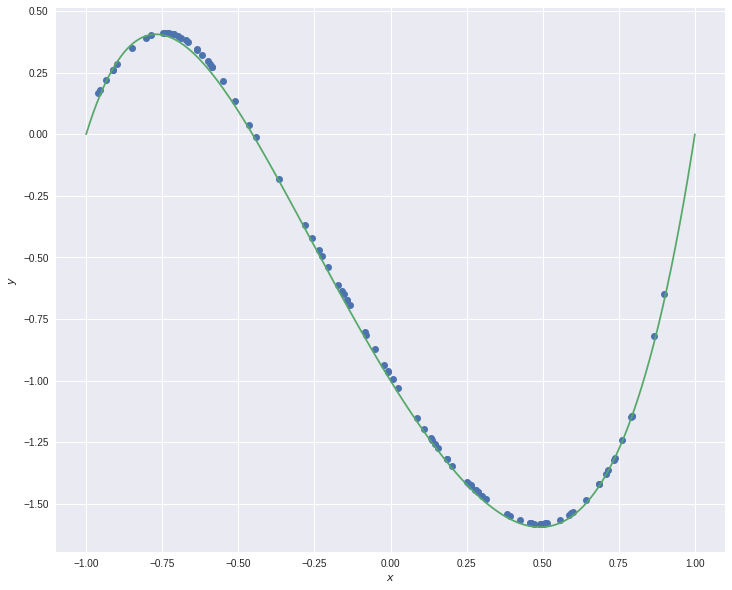

In [12]:
fig = plt.figure(figsize=(12,10))
plt.plot(x_test[:100], y_pred, 'o')
plt.plot(x, fx)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.show()